## Matplotlib circuit drawing for Qibo

Qibo now uses matplotlib to draw circuit, this new feature is base on `plot` function, you can pass the Qibo circuit along a built-in or custom style among other options.

Follow the examples below to learn how to use it.

The default function signature for `plot`:
    
```python
plot(circuit, scale=0.6, cluster_gates=True, style=None)
```
The parameters on nthis function are:

- `circuit`: Qibo circuit (mandatory)
- `scale`: Scale up or down the output plot (optional, default value: 0.6)
- `cluster_gates`: Group gates (optional, default value: True)
- `style`: Style your circuit with a built-n style or custom style (optional, default vale: None)

In [35]:
# General libraries
import matplotlib.pyplot as plt
import numpy as np

# Qibo libraries
import qibo
from qibo import gates, models
from qibo.models import Circuit, QFT

# new plot function based on matplotlib
from qibo.ui import plot_circuit

%matplotlib inline

In [36]:
nqubits = 4
nlayers = 3

# Create variational ansatz circuit Twolocal
ansatz = models.Circuit(nqubits)
for l in range(nlayers):
    
    ansatz.add((gates.RY(q, theta=0) for q in range(nqubits)))
    
    for i in range(nqubits - 3):
        ansatz.add(gates.CNOT(i, i+1))
        ansatz.add(gates.CNOT(i, i+2))
        ansatz.add(gates.CNOT(i+1, i+2))
        ansatz.add(gates.CNOT(i, i+3))
        ansatz.add(gates.CNOT(i+1, i+3))
        ansatz.add(gates.CNOT(i+2, i+3))
    
ansatz.add((gates.RY(q, theta=0) for q in range(nqubits)))
ansatz.add(gates.M(qubit) for qubit in range(2))
ansatz.draw()

q0: ─RY─o─o───o─────RY─o─o───o─────RY─o─o───o─────RY─M─
q1: ─RY─X─|─o─|─o───RY─X─|─o─|─o───RY─X─|─o─|─o───RY─M─
q2: ─RY───X─X─|─|─o─RY───X─X─|─|─o─RY───X─X─|─|─o─RY───
q3: ─RY───────X─X─X─RY───────X─X─X─RY───────X─X─X─RY───


#### Plot circuit with default black and white style

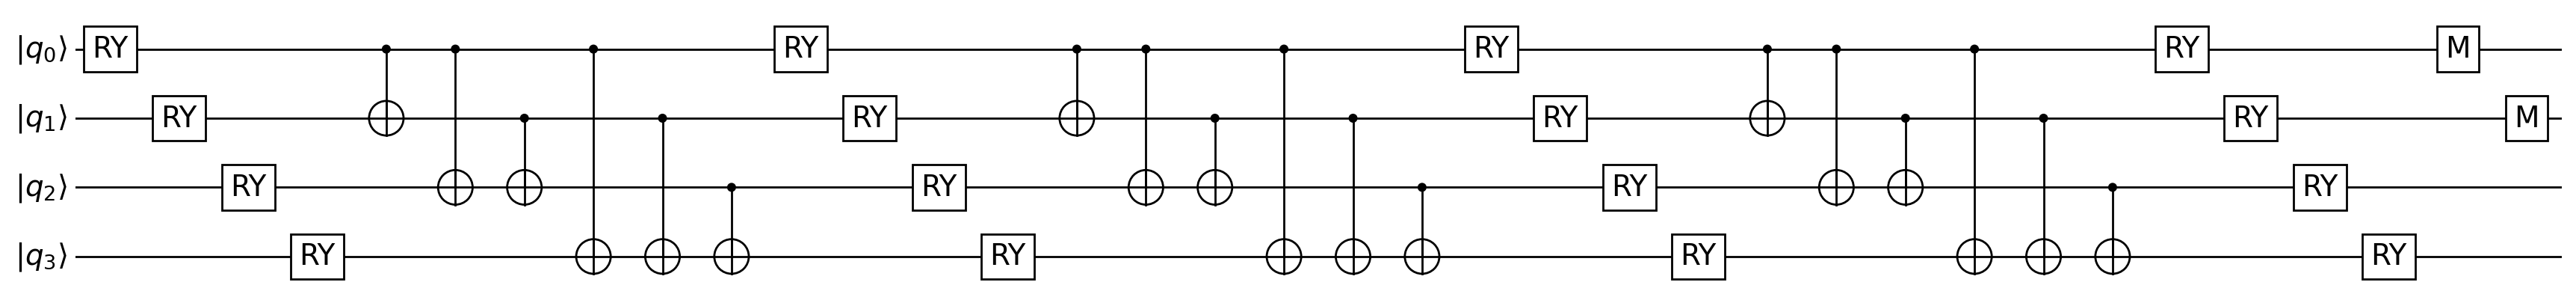

In [37]:
plot_circuit(ansatz, scale = 0.6, cluster_gates = False);

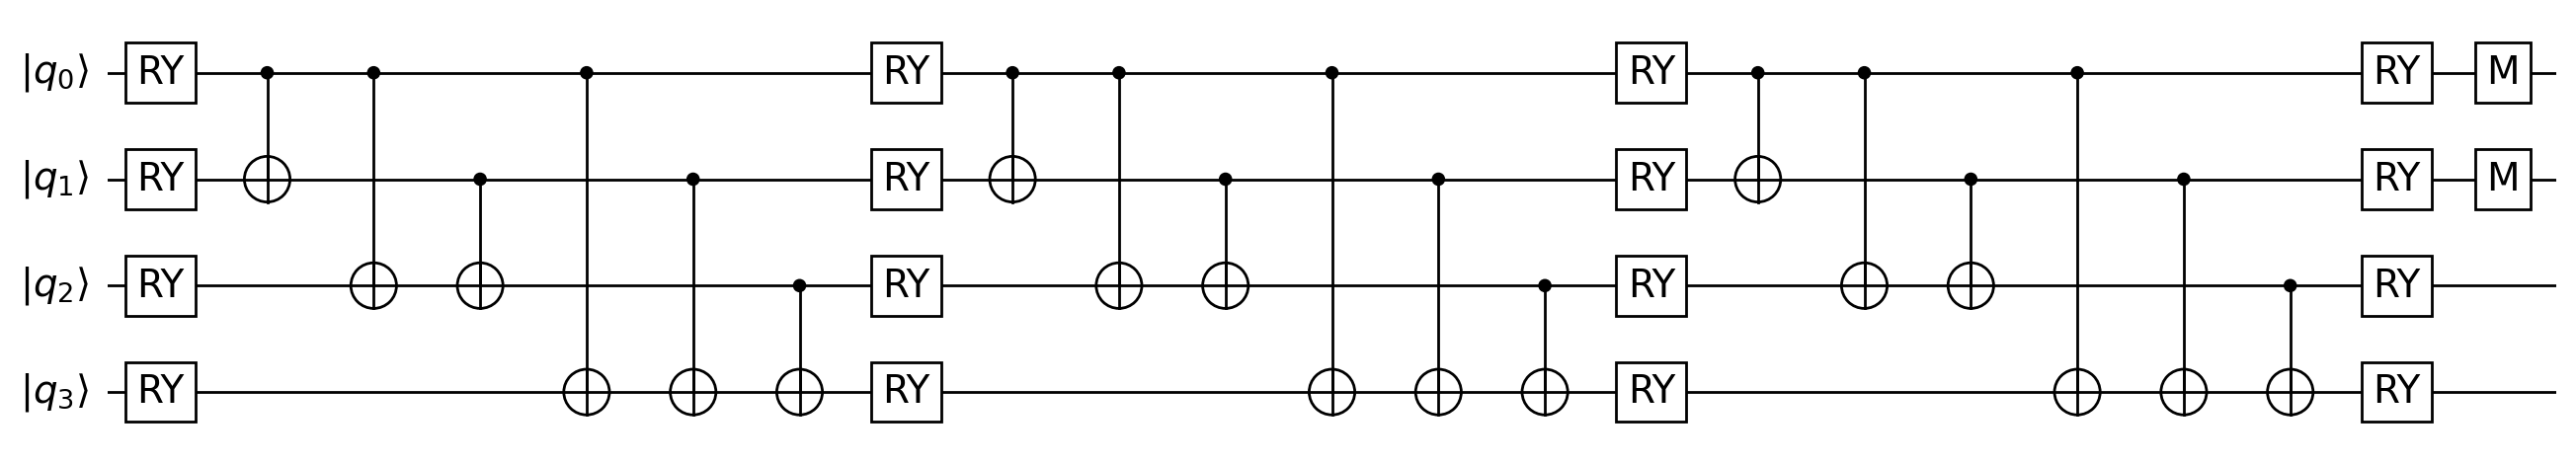

In [38]:
plot_circuit(ansatz, scale = 0.7, cluster_gates = True);

In [39]:
c = models.Circuit(3)
c.add(gates.H(1))
c.add(gates.X(1))
c.add(gates.SX(2))
c.add(gates.CSX(0,2))
c.add(gates.TOFFOLI(0,1, 2))
c.add(gates.CNOT(1, 2))
c.add(gates.SWAP(1,2))
c.add(gates.SiSWAP(1,2))
c.add(gates.FSWAP(1,2))
c.add(gates.DEUTSCH(1, 0, 2, np.pi))
c.add(gates.X(1))
c.add(gates.X(0))
c.add(gates.M(qubit) for qubit in range(2))
c.draw()

q0: ──────o───o───────────o──X─M─
q1: ─H──X─|───o─o─x─si─fx─o──X─M─
q2: ─SX───CSX─X─X─x─si─fx─DE─────


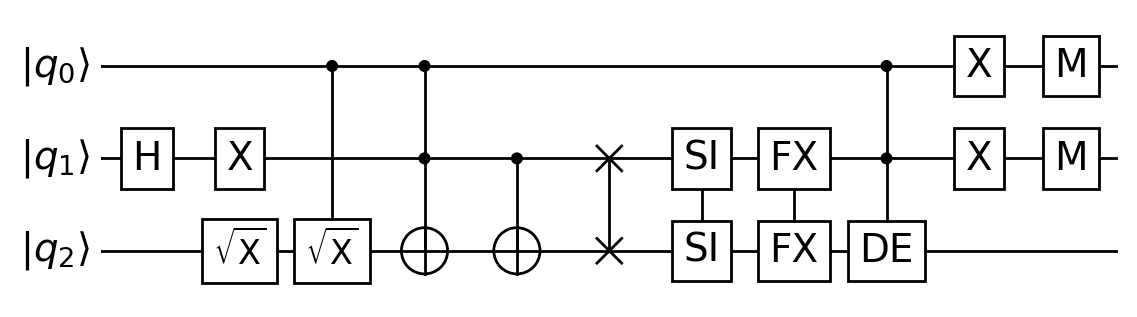

In [40]:
plot_circuit(c);

In [41]:
c = QFT(5)
c.add(gates.M(qubit) for qubit in range(2))

c.draw()

q0: ─H─U1─U1─U1─U1───────────────────────────x───M─
q1: ───o──|──|──|──H─U1─U1─U1────────────────|─x─M─
q2: ──────o──|──|────o──|──|──H─U1─U1────────|─|───
q3: ─────────o──|───────o──|────o──|──H─U1───|─x───
q4: ────────────o──────────o───────o────o──H─x─────


#### Plot circuit with built-in styles

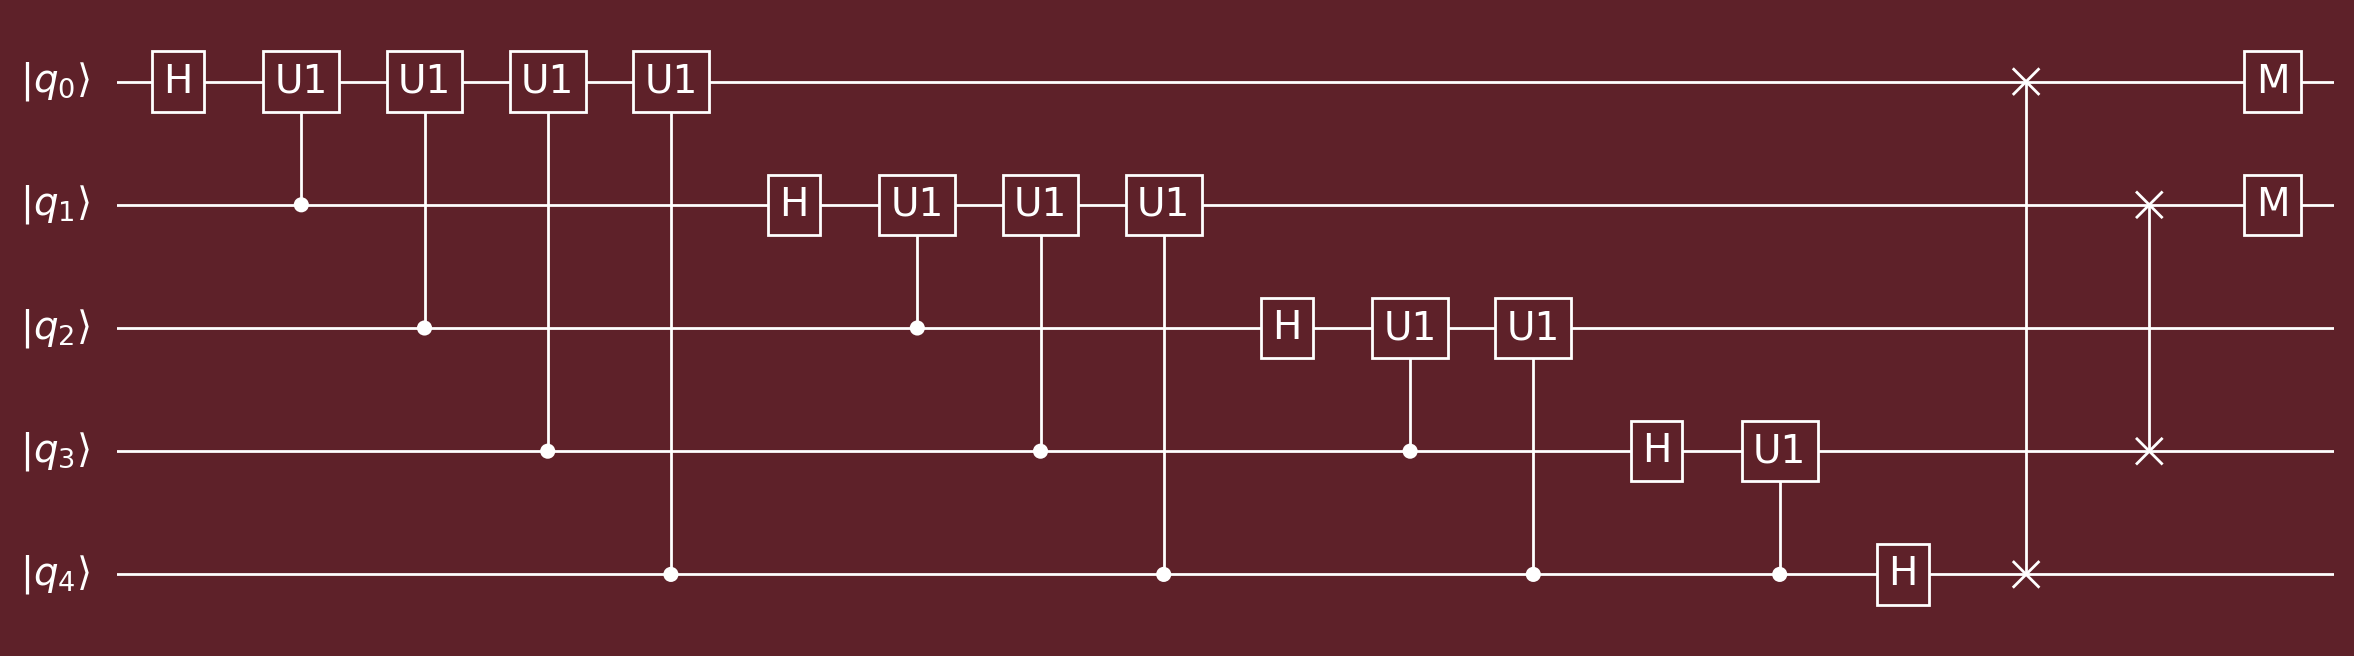

In [42]:
plot_circuit(c, scale = 0.8, cluster_gates = True, style="garnacha");

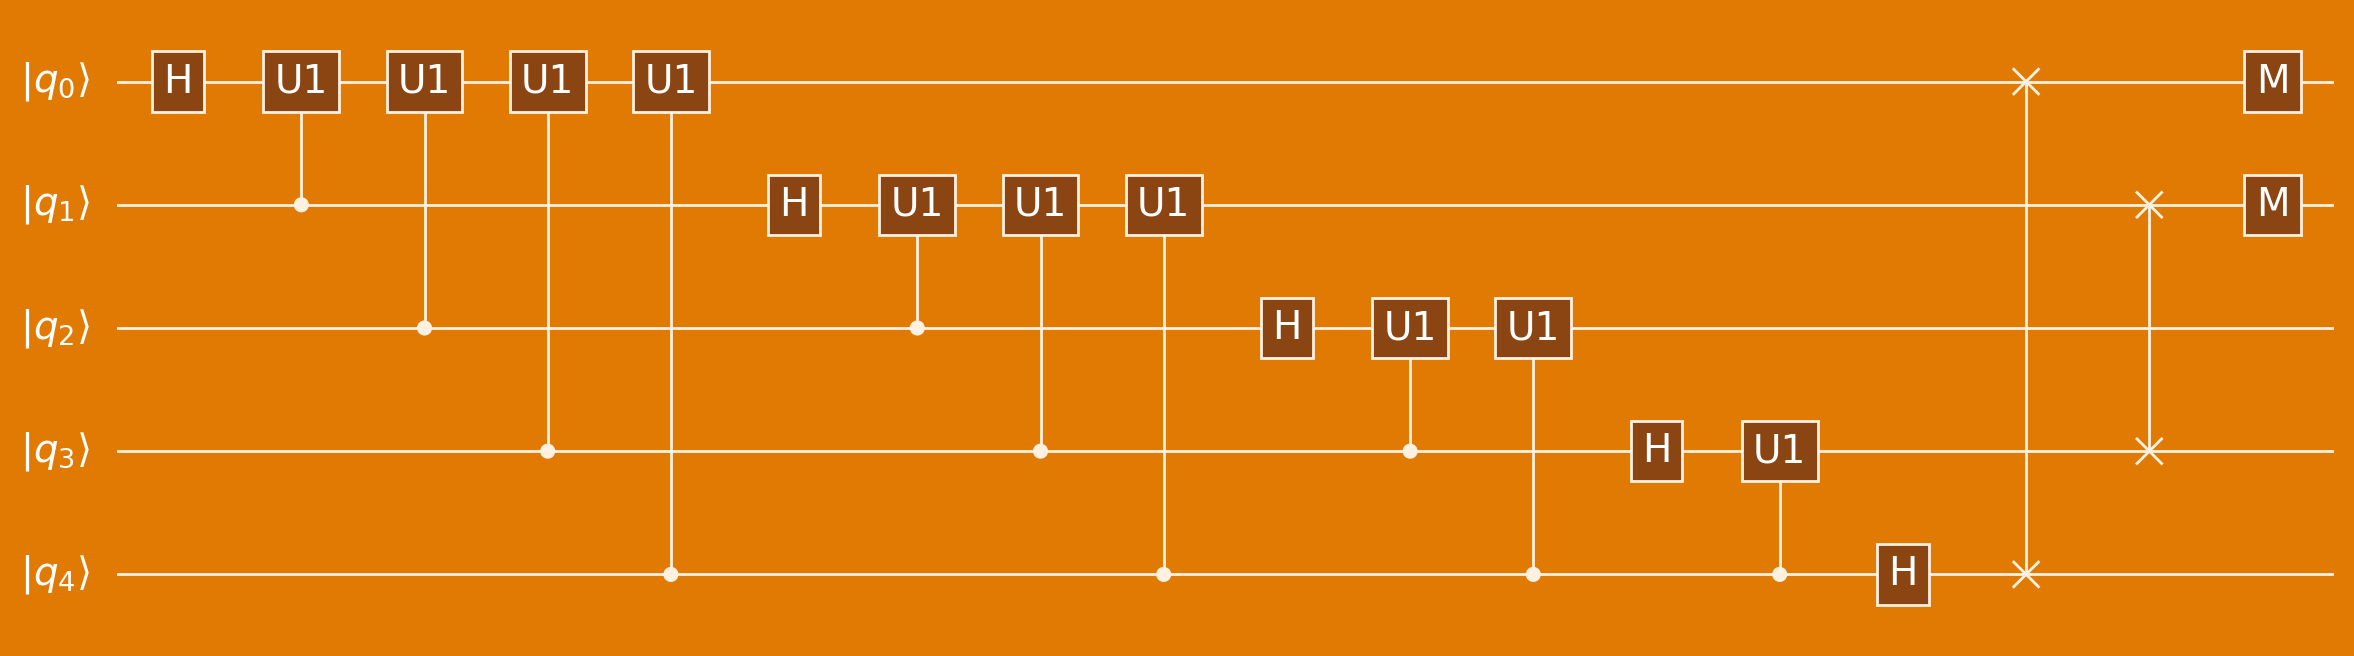

In [43]:
plot_circuit(c, scale = 0.8, cluster_gates = True, style="fardelejo");

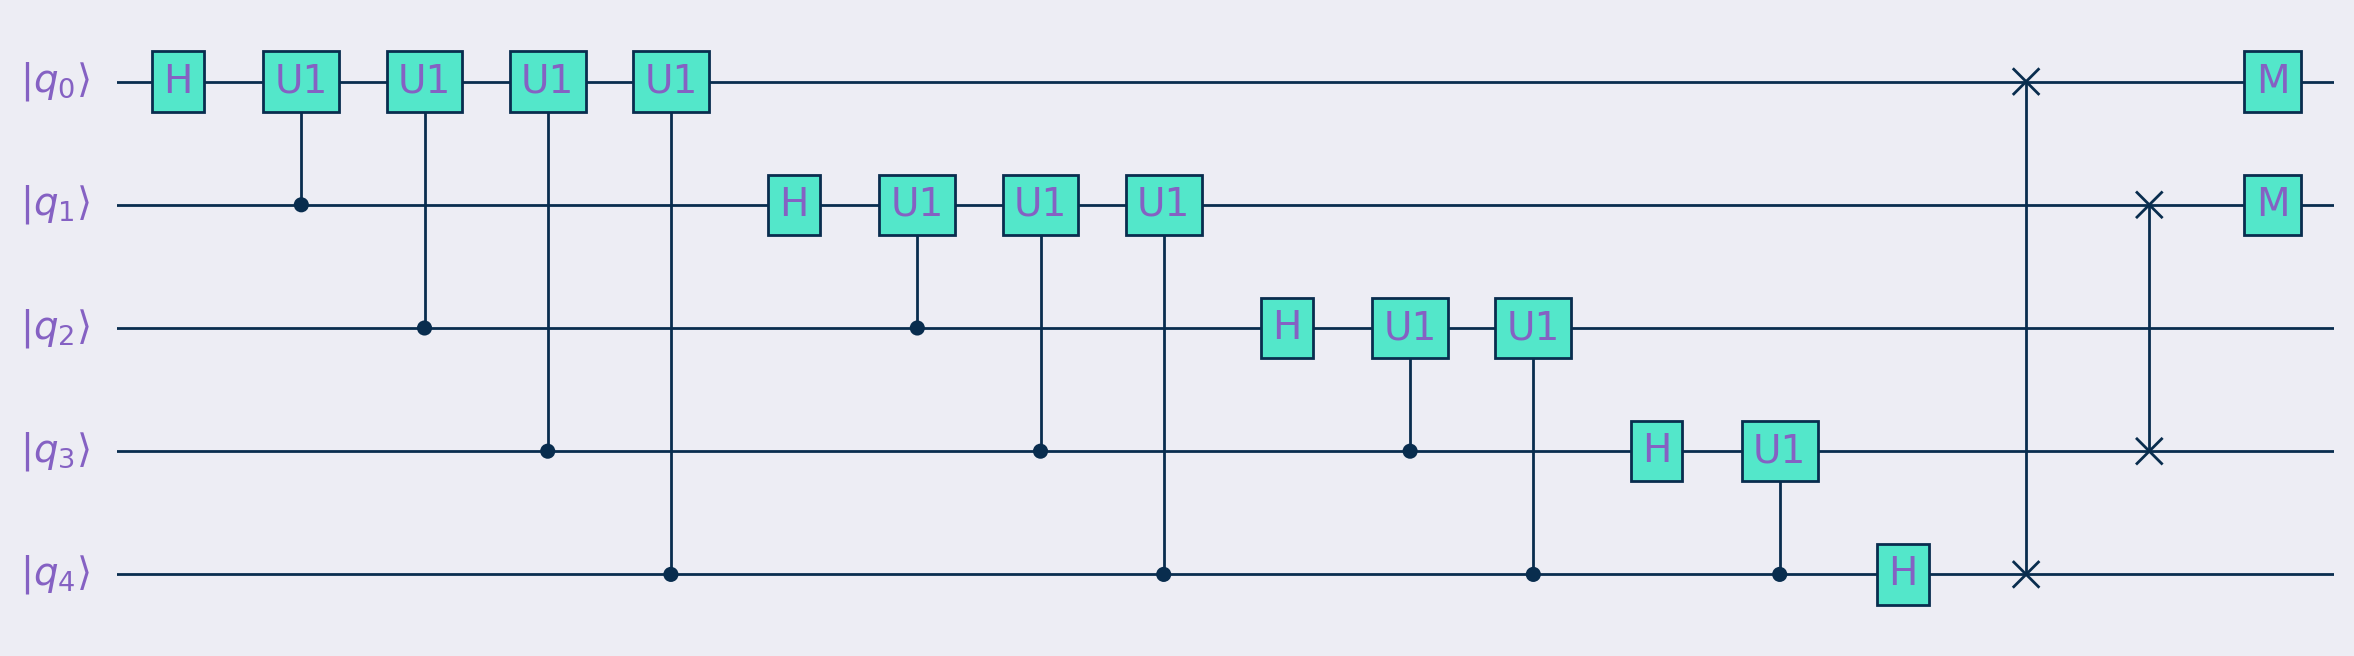

In [44]:
plot_circuit(c, scale = 0.8, cluster_gates = True, style="quantumspain");

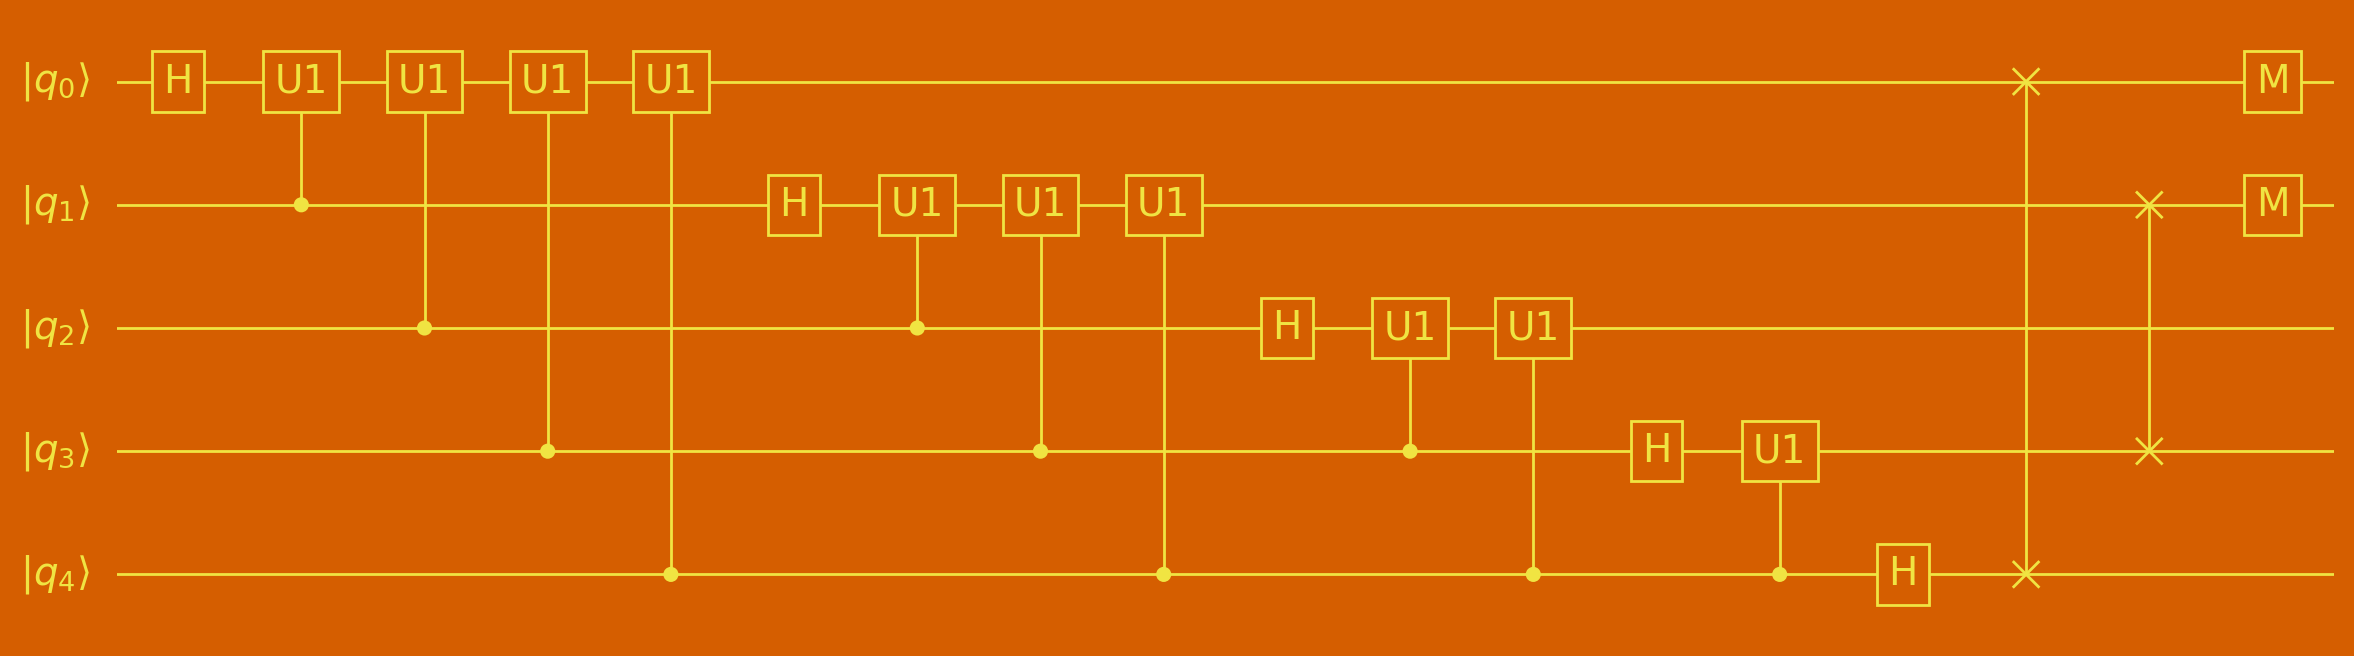

In [45]:
plot_circuit(c, scale = 0.8, cluster_gates = True, style="color-blind");

#### Plot circuit with custom style

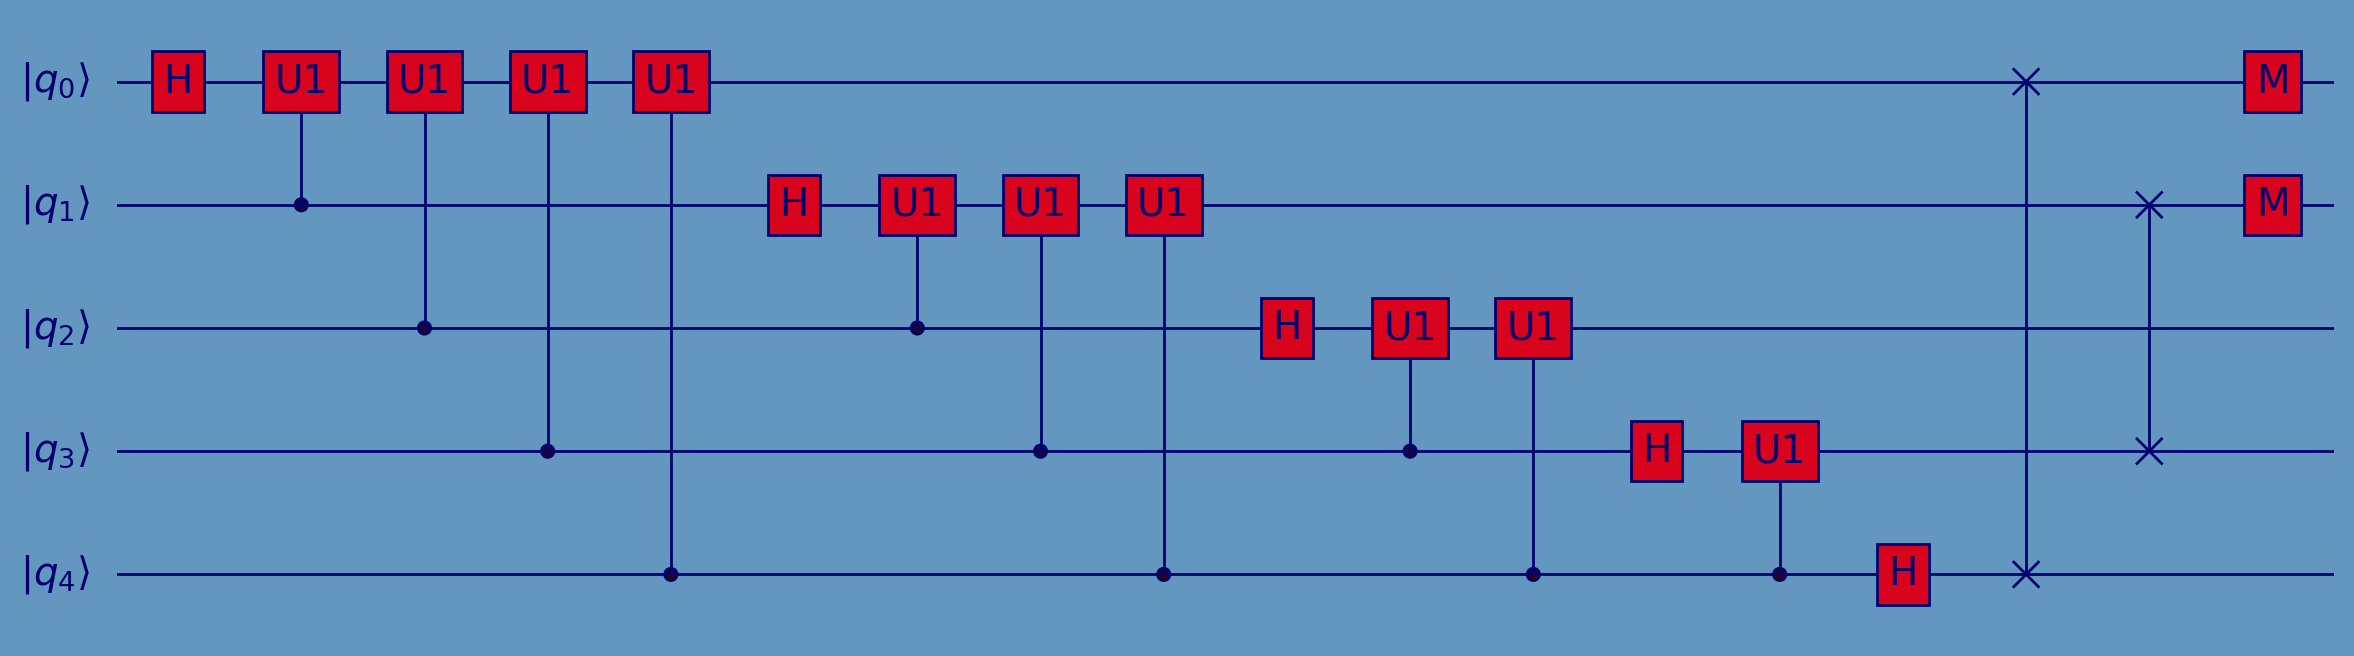

In [46]:
custom_style = {
    "facecolor" : "#6497bf",
    "edgecolor" : "#01016f",
    "linecolor" : "#01016f",
    "textcolor" : "#01016f",
    "fillcolor" : "#ffb9b9",
    "gatecolor" : "#d8031c",
    "controlcolor" : "#360000"
}

plot_circuit(c, scale = 0.8, cluster_gates = True, style=custom_style);

In [47]:
c.fuse().draw()

q0: ─[─H─U1───]─U1─U1─U1─────────────────────────────────────x───M─
q1: ─[───o──H─]─|──|──|──[─U1───]─U1─U1──────────────────────|─x─M─
q2: ────────────o──|──|──[─o──H─]─|──|──[─U1───]─U1──────────|─|───
q3: ───────────────o──|───────────o──|──[─o──H─]─|──[─U1───]─|─x───
q4: ──────────────────o──────────────o───────────o──[─o──H─]─x─────


#### Plot fused circuit with built-in style

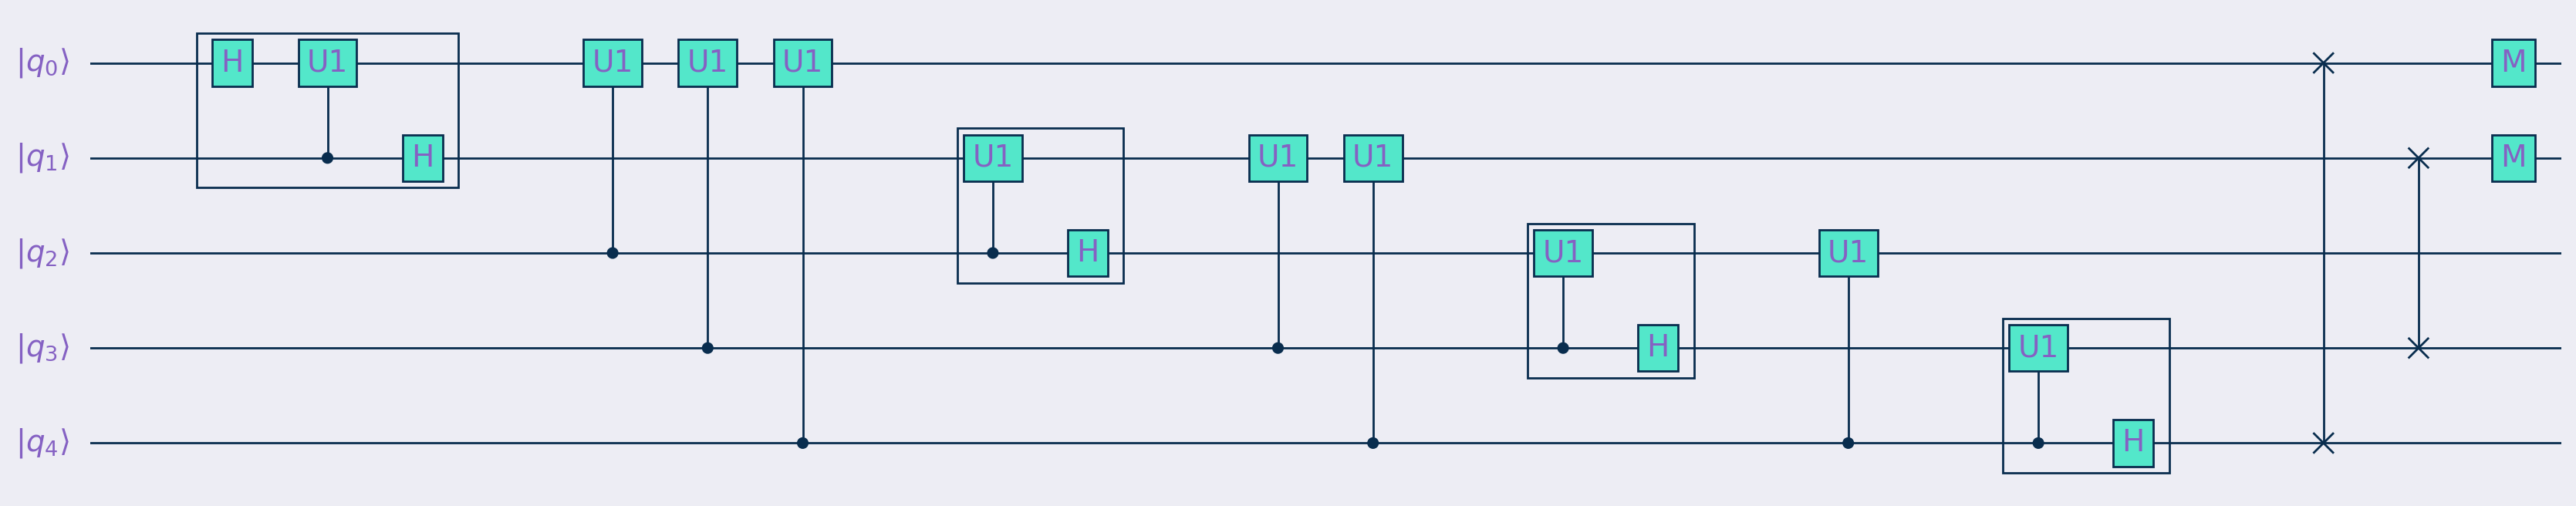

In [48]:
plot_circuit(c.fuse(), scale = 0.8, cluster_gates = True, style="quantumspain");

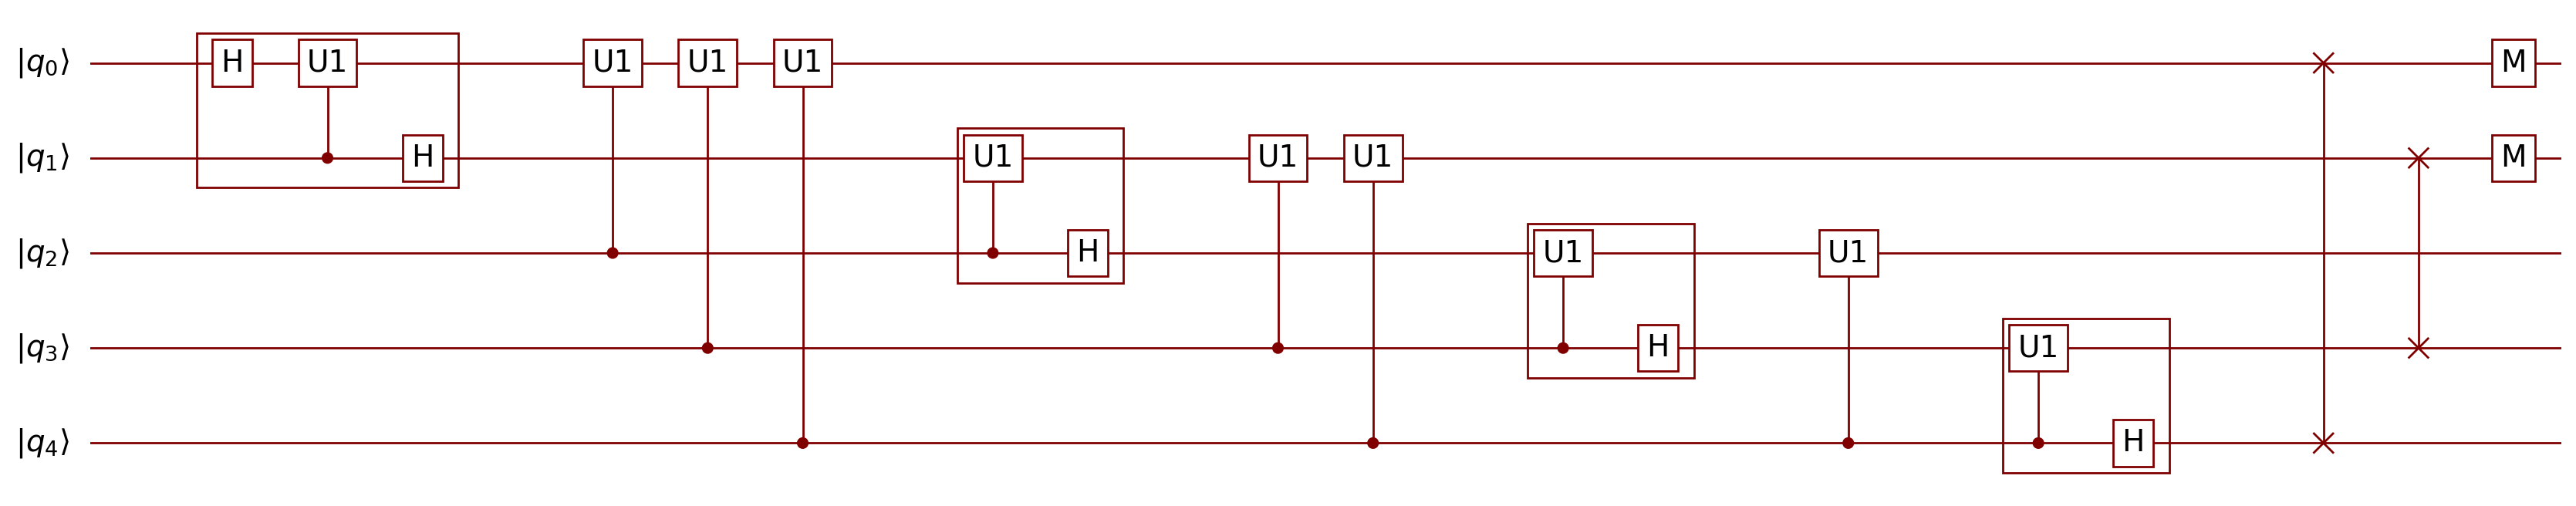

In [49]:
plot_circuit(c.fuse(), scale = 0.8, cluster_gates = True, style="cachirulo");

### Change the image resolution

It is possible to change the image resolution by setting the pixel density per inches (dpi).

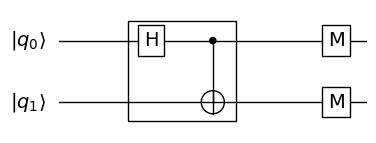

In [50]:
c = Circuit(2)
c.add(gates.H(0))
c.add(gates.CNOT(0,1))
c.add(gates.M(0,1))

# small dpi value
plot_circuit(c.fuse(), scale = 0.8, cluster_gates = True, dpi=100);

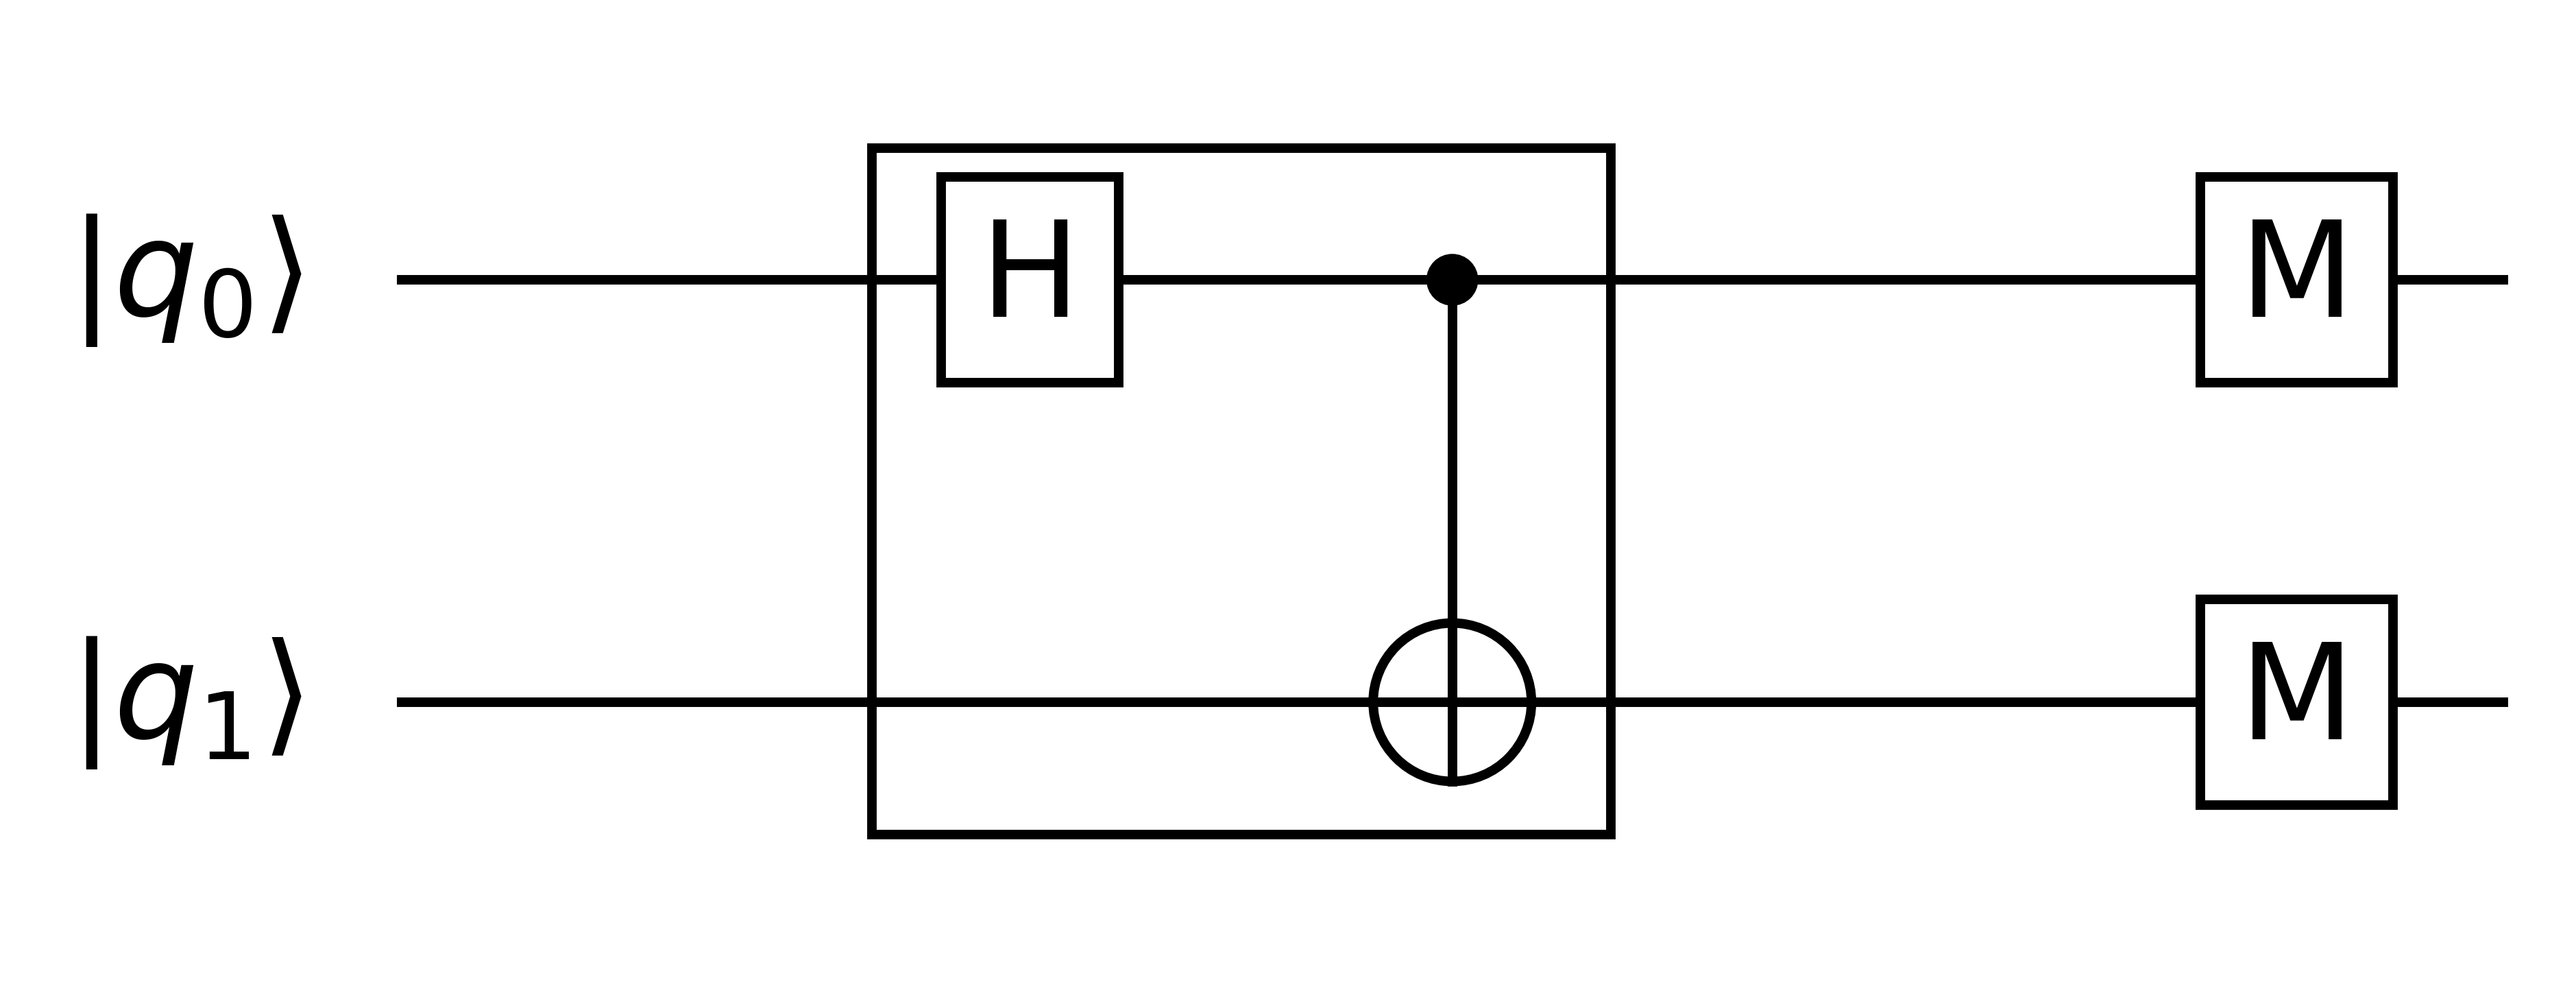

In [51]:
# higher definition
plot_circuit(c.fuse(), scale = 0.8, cluster_gates = True, dpi=1000);